In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_regression

In [2]:
data=pd.read_csv("/content/taxi fare.csv")

In [3]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [5]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
data.drop(['key','pickup_datetime'],axis=1,inplace=True)

In [8]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        50000 non-null  float64
 1   pickup_longitude   50000 non-null  float64
 2   pickup_latitude    50000 non-null  float64
 3   dropoff_longitude  50000 non-null  float64
 4   dropoff_latitude   50000 non-null  float64
 5   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.3 MB


<Axes: >

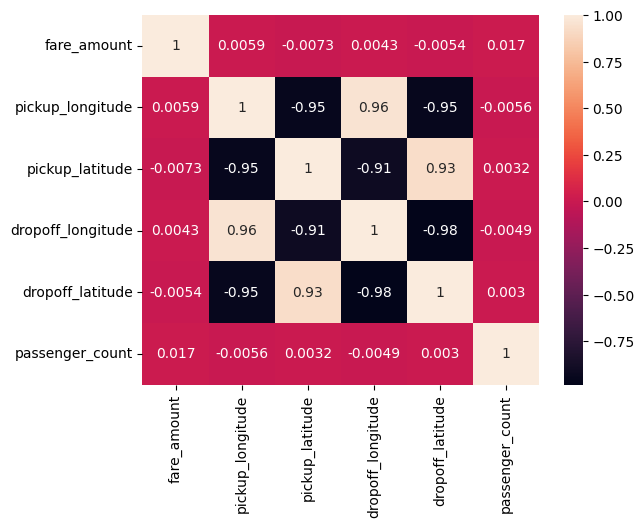

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
X=data.drop('fare_amount',axis=1)

In [12]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.844311,40.721319,-73.841610,40.712278,1
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1
49996,-73.984756,40.768211,-73.987366,40.760597,1
49997,-74.002698,40.739428,-73.998108,40.759483,1
49998,-73.946062,40.777567,-73.953450,40.779687,2


In [13]:
Y=data['fare_amount']

In [14]:
Y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: fare_amount, Length: 50000, dtype: float64

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
linear=LinearRegression()

In [17]:
linear.fit(xtrain,ytrain)

LinearRegression()

In [18]:
ypred=linear.predict(xtest)

In [19]:
ypred

array([11.2830892 , 11.41503807, 11.28567442, ..., 11.28390498,
       11.28158166, 11.55210422])

In [20]:
mse=mean_squared_error(ypred,ytest)

In [21]:
mse

92.94908043573297

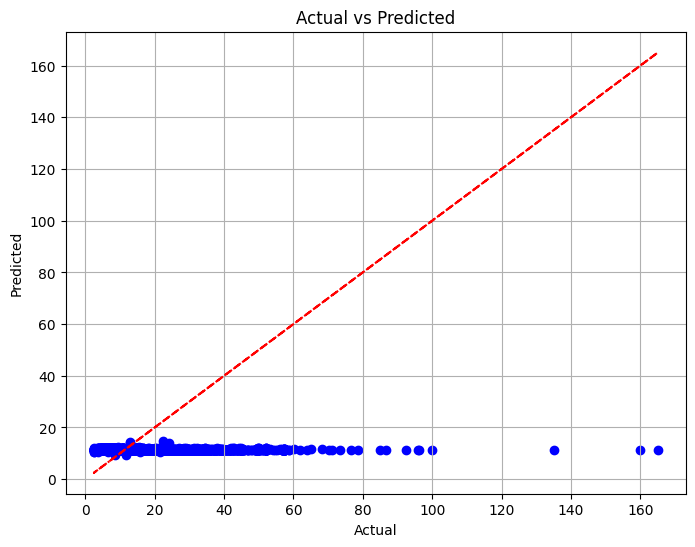

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, color='blue')
plt.plot(ytest, ytest, color='red', linestyle='--')  # Plotting the line of perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


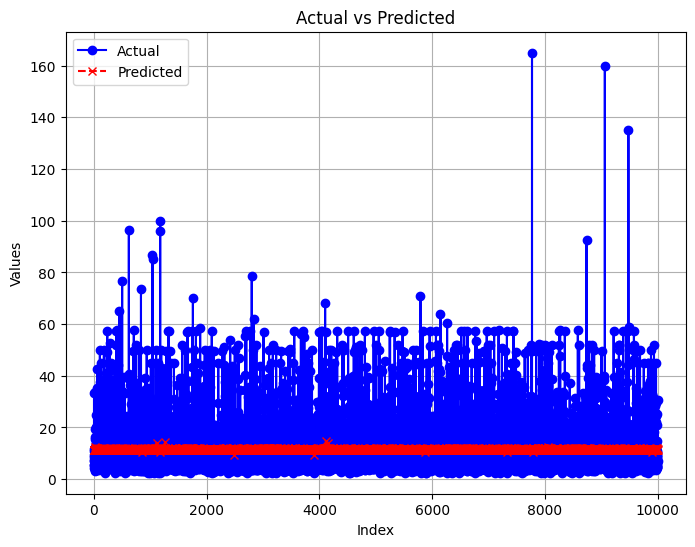

In [23]:
x = range(len(ytest))
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, ytest, marker='o', color='blue', label='Actual')
plt.plot(x, ypred, marker='x', color='red', linestyle='--', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


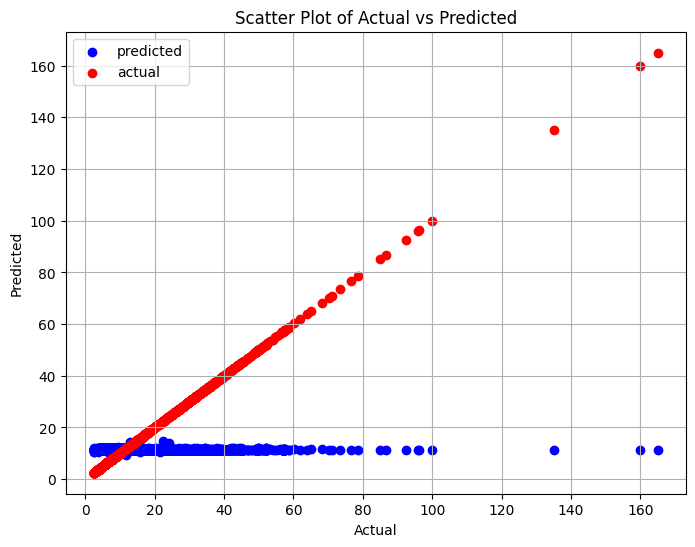

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, color='blue',label="predicted")
plt.scatter(ytest, ytest, color='red',label="actual")
plt.title('Scatter Plot of Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.legend()
plt.show()


In [25]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [27]:
# Train the model
history = model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1000/1000 [==============================] - 3s 2ms/step - loss: 98.5091 - val_loss: 92.2227
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 96.3241 - val_loss: 92.0915
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 96.1770 - val_loss: 92.3263
Epoch 4/50
1000/1000 [==============================] - 3s 3ms/step - loss: 95.3688 - val_loss: 92.0398
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 95.2061 - val_loss: 91.8799
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 95.0378 - val_loss: 92.0247
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 94.9815 - val_loss: 92.5592
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 94.9790 - val_loss: 91.8791
Epoch 9/50
1000/1000 [==============================] - 3s 3ms/step - loss: 94.8936 - val_loss: 91.7964
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/

In [28]:
# Evaluate the model on the test set
mse = model.evaluate(xtest, ytest)
print("Mean Squared Error on Test Set:", mse)

313/313 [==============================] - 1s 1ms/step - loss: 93.0162
Mean Squared Error on Test Set: 93.01616668701172


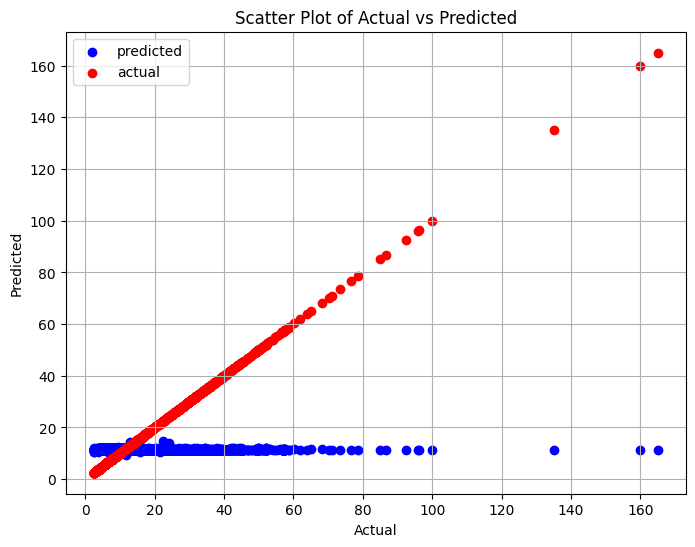

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, color='blue',label="predicted")
plt.scatter(ytest, ytest, color='red',label="actual")
plt.title('Scatter Plot of Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.legend()
plt.show()
